<a href="https://colab.research.google.com/github/MrCogito/Spectrogram-Generator/blob/main/Data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Generate spectrogram**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras 
import pathlib
import os
import librosa
import librosa.display
import IPython.display as ipd
import soundfile
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
!unzip /content/gdrive/MyDrive/Inzynierka/Data/en_tiny.zip > /dev/null

In [ ]:
audio_folder = '/content/en_tiny/'
spectrogram_folder = '/content/gdrive/MyDrive/Inzynierka/Data/en_spectrogram/'
audio_trim_folder = '/content/gdrive/MyDrive/Inzynierka/Data/audio_trim_folder/'


In [ ]:
#Create spectrograms 
target_size = 1672 # 1672 is size of biggest audio clip 
for filename in os.listdir(audio_folder)[:192]:
  if filename.endswith("mp3"):
    audio_file, sr = librosa.load(audio_folder + filename)                                      # Load audio file
    audio_file_trim, index = librosa.effects.trim(audio_file, top_db = 15)                      # Trim silnce with threshold equal to 15dB
    audio_file_trim_4k = librosa.resample(audio_file_trim, sr, target_sr = 4000)                # resample to 4k 
    audio_fix_length = librosa.util.fix_length(audio_file_trim_4k, target_size, axis=- 1)       # get same length in all clips
    soundfile.write(audio_trim_folder + filename + '.wav', audio_fix_length, samplerate = 4000) # save audio clips to audio_trim_folder
    spectrogram = librosa.stft(audio_fix_length, n_fft=510,)                                    # create spectrogram.  n_fft size set to 510 to get 256 x n shape of spectrogram 
    S_db = librosa.amplitude_to_db(np.abs(spectrogram), ref=np.max) 
    np.save(spectrogram_folder + filename, S_db)                            

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/cor

4096
(256, 16)
-80.0


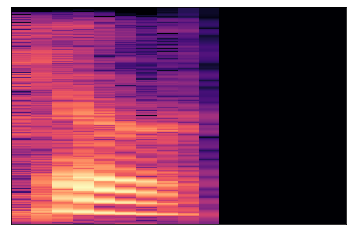

In [ ]:
#Add 2 rows to get size equal to 4096
rows_to_add = (-80)*(np.ones((256,2)))
paded = np.c_[S_db,rows_to_add]
print(paded.size)
print(paded.shape)
librosa.display.specshow(paded)
print(paded[255,1])


[[-62.426315 -47.717705 -41.029896 ... -42.320946 -48.77987  -80.      ]
 [-48.502426 -45.364456 -43.340378 ... -42.177155 -48.704052 -80.      ]
 [-46.90612  -51.093765 -49.521812 ... -42.05369  -48.480988 -80.      ]
 ...
 [-56.737015 -63.00022  -80.       ... -78.81355  -80.       -80.      ]
 [-56.81044  -62.847305 -80.       ... -78.958466 -80.       -80.      ]
 [-56.74018  -62.504692 -80.       ... -79.04802  -80.       -80.      ]]
(256, 14)


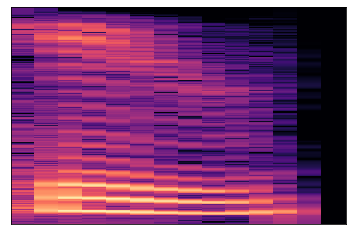

In [ ]:
zaladowane = np.load('/content/gdrive/MyDrive/Inzynierka/Data/en_spectrogram/common_voice_en_22176085.mp3.npy')
print(zaladowane)
print(zaladowane.shape)
librosa.display.specshow(zaladowane)